In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , f1_score

In [7]:
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string

# Initialize the stemmer
stemmer = SnowballStemmer("english")

# Load the stopwords
stopword = set(stopwords.words("english"))


In [3]:
df = pd.read_csv("twitter_data.csv")
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [4]:
df["labels"] = df["class"].map({0:"Hate Speech Detected",1:"Offensive language Detected",2:"No Hate and Offensive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No Hate and Offensive speech  
1   Offensive language Detected  
2   Offensive language Detected  
3   Offensive language Detected  
4   Offensive language Detected  


In [5]:
df = df[['tweet','labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language Detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language Detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language Detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language Detected


In [8]:

# Function to clean text
def clean(text):
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newlines
    text = re.sub('\w*\d\w*', '', text)  # Remove words containing numbers
    text = [word for word in text.split(' ') if word not in stopword]  # Remove stopwords
    text = [stemmer.stem(word) for word in text]  # Apply stemming
    text = " ".join(text)  # Join words back into a single string
    return text

# Apply the clean function to the 'tweet' column
df['tweet'] = df['tweet'].apply(clean)

# Display the first few rows of the DataFrame
df.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive speech
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive language Detected
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive language Detected
3,rt cganderson vivabas look like tranni,Offensive language Detected
4,rt shenikarobert shit hear might true might f...,Offensive language Detected


In [9]:
x = np.array(df['tweet'])
y = np.array(df['labels'])

cv = CountVectorizer()
x = cv.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # You can choose 'weighted', 'macro', or 'micro'

# Print the accuracy and F1 score
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.8743122631128499
F1 Score: 0.8728230242102394


In [10]:
test_data = "I will kill you"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))

['Hate Speech Detected']


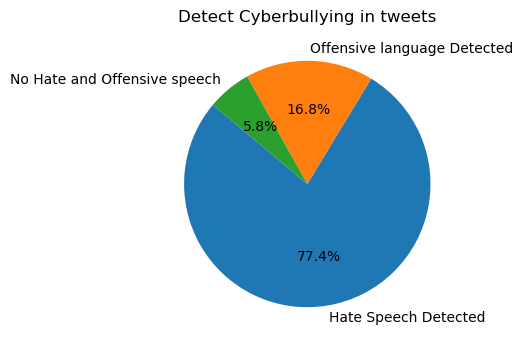

In [15]:
import matplotlib.pyplot as plt

df = pd.read_csv("twitter_data.csv")
# Count occurrences of each label
label_counts = df['class'].value_counts()

# Labels for the pie chart
labels = ['Hate Speech Detected', 'Offensive language Detected', 'No Hate and Offensive speech']

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Detect Cyberbullying in tweets')
plt.show()


In [12]:
test_data = "you are awesome"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))

['No Hate and Offensive speech']


In [14]:
test_data = "I don't like you"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))

['Offensive language Detected']
